In [1]:
# @title 1. Setup Environment & Install CheXpert Labeler
# This step installs Java, NegBio, and clones the labeler repository.

import os
import sys

# --- Critical: Upgrade pip and setuptools for Python 3.12 compatibility ---
!pip install --upgrade pip setuptools
# --------------------------------------------------------------------------

# 1. Install Java (Required for CheXpert Labeler)
!apt-get update -qq
!apt-get install -y default-jdk -qq

# 2. Install Python Dependencies
# Install core packages and then general ones.
# Explicitly install bllipparser version compatible with NegBio 0.9.4
!pip install -q datasets pandas bllipparser==2016.9.11

# 3. Clone the Official CheXpert Labeler Repository
if not os.path.exists("chexpert-labeler"):
    !git clone https://github.com/stanfordmlgroup/chexpert-labeler.git

# 4. Install NegBio
if not os.path.exists("NegBio"):
    print("Cloning and installing NegBio...")
    !git clone https://github.com/ncbi-nlp/NegBio.git
    # Change directory into NegBio and run setup.py install
    !cd NegBio && python setup.py install --user
else:
    print("NegBio directory already exists.")

import nltk
nltk.download('punkt')
nltk.download('punkt_tab') # Add this line to download the missing resource

print("Environment setup complete.")

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package libatspi2.0-0:amd64.
(Reading database ... 121713 files and directories currently installed.)
Preparing to unpack .../00-libatspi2.0-0_2.44.0-3_amd64.deb ...
Unpacking libatspi2.0-0:amd64 (2.44.0-3) ...
Selecting previously unselected package libxtst6:amd64.
Preparing to unpack .../01-libxtst6_2%3a1.2.3-1build4_amd64.deb ...
Unpacking libxtst6:amd64 (2:1.2.3-1build4) ...
Selecting previously unselected package session-migration.
Preparing to unpack .../02-session-migration_0.3.6_amd64.deb ...
Unpacking session-migration (0.3.6) ...
Selecting previously unselected package gsettings-desktop-schemas.
Preparing to unpack .../03-gsettings-desktop-schemas_42.0-1ubuntu1_all.deb ...
Unpacking gsettings-desktop-schemas (42.0-1ubuntu1) ...
Selecting previously unselected

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [2]:
!pip install -q bllipparser

!python -m bllipparser.ModelFetcher -i GENIA+PubMed


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
negbio 0.9.4 requires bioc==1.3.1, which is not installed.
negbio 0.9.4 requires docopt==0.6.2, which is not installed.
negbio 0.9.4 requires JPype1>=0.6.3, which is not installed.
negbio 0.9.4 requires pathlib2==2.3.3, which is not installed.
negbio 0.9.4 requires pymetamap==0.1, which is not installed.
negbio 0.9.4 requires pystanforddependencies==0.3.1, which is not installed.
negbio 0.9.4 requires bllipparser==2016.9.11, but you have bllipparser 2021.11.7 which is incompatible.
negbio 0.9.4 requires docutils==0.14, but you have docutils 0.21.2 which is incompatible.
negbio 0.9.4 requires future==0.16.0, but you have future 1.0.0 which is incompatible.
negbio 0.9.4 requires netw

In [4]:
!pip install -q PyStanfordDependencies bioc


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
negbio 0.9.4 requires JPype1>=0.6.3, which is not installed.
negbio 0.9.4 requires pathlib2==2.3.3, which is not installed.
negbio 0.9.4 requires pymetamap==0.1, which is not installed.
negbio 0.9.4 requires bioc==1.3.1, but you have bioc 2.1 which is incompatible.
negbio 0.9.4 requires bllipparser==2016.9.11, but you have bllipparser 2021.11.7 which is incompatible.
negbio 0.9.4 requires docutils==0.14, but you have docutils 0.21.2 which is incompatible.
negbio 0.9.4 requires future==0.16.0, but you have future 1.0.0 which is incompatible.
negbio 0

In [6]:
!pip install -q pathlib2

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
negbio 0.9.4 requires JPype1>=0.6.3, which is not installed.
negbio 0.9.4 requires pymetamap==0.1, which is not installed.
negbio 0.9.4 requires bioc==1.3.1, but you have bioc 2.1 which is incompatible.
negbio 0.9.4 requires bllipparser==2016.9.11, but you have bllipparser 2021.11.7 which is incompatible.
negbio 0.9.4 requires docutils==0.14, but you have docutils 0.21.2 which is incompatible.
negbio 0.9.4 requires future==0.16.0, but you have future 1.0.0 which is incompatible.
negbio 0.9.4 requires networkx==1.11, but you have networkx 3.6 which is incompatible.
negbio 0.9.4 requires nltk==3.6.6, but you have nltk 3.9.1 which is incompatible.
negbio 0.9.4 requires numpy==1.21.0, but you have numpy 2.0.2 which is incompatible.
negbio 0.9.4 requires pathlib2==2.3.3, but you have pathlib2 2.3.7.post1 which is incom

In [1]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Create a folder in your Drive to store the results
# Change 'MyCheXpertData' to whatever you want
SAVE_DIR = "/content/drive/MyDrive/MyCheXpertData"
os.makedirs(SAVE_DIR, exist_ok=True)

print(f"Checkpoints will be saved to: {SAVE_DIR}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Checkpoints will be saved to: /content/drive/MyDrive/MyCheXpertData


In [8]:
import pandas as pd
import nltk
import subprocess
import os
import glob
import shutil
import zipfile
import re
from tqdm.notebook import tqdm

# --- CONFIGURATION ---
ZIP_FILE_PATH = "/content/mimic-cxr-reports.zip" # Local path
SAVE_DIR = "/content/drive/MyDrive/MyCheXpertData" # Drive path
REPO_PATH = "/content/chexpert-labeler"
BATCH_SIZE = 50   # Process 50 reports per batch
TOTAL_LIMIT = 5000 # Stop after this many reports
# ---------------------

# Ensure output directory exists
os.makedirs(SAVE_DIR, exist_ok=True)

# Ensure NLTK data is present
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')
    nltk.download('punkt_tab')

def parse_mimic_text(raw_text):
    """Extracts FINDINGS and IMPRESSION from raw text."""
    text = raw_text.replace('\r', '\n')
    patterns = {
        'findings': r'(?:FINDINGS|Findings|findings):?\s*(.*?)(?=\n\s*[A-Z]+:|$)',
        'impression': r'(?:IMPRESSION|Impression|impression):?\s*(.*?)(?=\n\s*[A-Z]+:|$)'
    }
    combined_text = ""
    f_match = re.search(patterns['findings'], text, re.DOTALL)
    if f_match: combined_text += f_match.group(1).strip() + " "
    i_match = re.search(patterns['impression'], text, re.DOTALL)
    if i_match: combined_text += i_match.group(1).strip()

    # Fallback to full text if empty (and text is long enough)
    if len(combined_text) < 10 and len(text) > 10:
        return text
    return combined_text

def run_labeler_on_batch(batch_df, batch_index):
    """Runs the labeler on a small dataframe."""
    temp_input = f"temp_batch_{batch_index}_in.csv"
    temp_output = f"temp_batch_{batch_index}_out.csv"

    # Prepare Input
    batch_df[['text_content']].rename(columns={'text_content': 'Reports'}).to_csv(temp_input, index=False)

    # Paths
    abs_input = os.path.abspath(temp_input)
    abs_output = os.path.abspath(temp_output)

    cmd = ["python", "label.py", "--reports_path", abs_input, "--output_path", abs_output]

    try:
        subprocess.run(
            cmd,
            cwd=REPO_PATH,
            stdout=subprocess.DEVNULL,
            stderr=subprocess.PIPE,
            check=True,
            text=True
        )
    except subprocess.CalledProcessError as e:
        print(f"❌ Error in batch {batch_index}: {e.stderr}")
        return None

    if os.path.exists(temp_output):
        df_labels = pd.read_csv(temp_output)
        batch_df = batch_df.reset_index(drop=True)
        df_labels = df_labels.reset_index(drop=True)
        result = pd.concat([batch_df, df_labels], axis=1)

        if 'Reports' in result.columns: result = result.drop(columns=['Reports'])
        if os.path.exists(temp_input): os.remove(temp_input)
        if os.path.exists(temp_output): os.remove(temp_output)
        return result
    return None

def main_pipeline():
    if not os.path.exists(ZIP_FILE_PATH):
        raise FileNotFoundError(f"❌ Zip file not found at {ZIP_FILE_PATH}")

    # 1. Determine Start Point (Smart Resume)
    existing_batches = glob.glob(os.path.join(SAVE_DIR, "batch_*.csv"))
    if existing_batches:
        # Extract indices: "batch_3.csv" -> 3
        indices = [int(os.path.basename(f).split('_')[1].split('.')[0]) for f in existing_batches]
        last_batch_idx = max(indices)
        start_batch_idx = last_batch_idx + 1
        reports_to_skip = start_batch_idx * BATCH_SIZE
        print(f"Found {len(existing_batches)} existing batches. Resuming at Batch {start_batch_idx} (Report #{reports_to_skip})")
    else:
        start_batch_idx = 0
        reports_to_skip = 0

    # 2. Open Zip and Get File List
    print("⏳ Reading Zip File entries...")
    with zipfile.ZipFile(ZIP_FILE_PATH, 'r') as z:
        all_files = [f for f in z.namelist() if f.endswith('.txt')]
        all_files.sort() # Ensure deterministic order

        # Apply Skip Logic
        files_to_process = all_files[reports_to_skip:]

        # Apply Total Limit
        if TOTAL_LIMIT:
            remaining_limit = TOTAL_LIMIT - reports_to_skip
            if remaining_limit <= 0:
                print("Total limit already reached in previous runs.")
                return
            files_to_process = files_to_process[:remaining_limit]

        print(f"Processing {len(files_to_process)} reports...")

        # 3. Processing Loop
        current_batch_sentences = []
        batch_idx = start_batch_idx
        reports_in_current_batch = 0

        for filename in tqdm(files_to_process, desc="Processing Reports"):
            # Read Text
            with z.open(filename) as f:
                raw_text = f.read().decode('utf-8')

            clean_text = parse_mimic_text(raw_text)
            if not clean_text.strip(): continue

            # Split Sentences
            sentences = nltk.tokenize.sent_tokenize(clean_text)
            for sent in sentences:
                clean_sent = sent.replace('\n', ' ').strip()
                if len(clean_sent) > 2:
                    current_batch_sentences.append({
                        'report_id': filename,
                        'text_content': clean_sent
                    })

            reports_in_current_batch += 1

            # Trigger Batch
            if reports_in_current_batch >= BATCH_SIZE:
                print(f"Processing Batch {batch_idx} ({len(current_batch_sentences)} sentences)...")

                df_batch = pd.DataFrame(current_batch_sentences)
                if not df_batch.empty:
                    labeled_df = run_labeler_on_batch(df_batch, batch_idx)
                    if labeled_df is not None:
                        save_path = os.path.join(SAVE_DIR, f"batch_{batch_idx}.csv")
                        labeled_df.to_csv(save_path, index=False)
                        print(f"Saved Batch {batch_idx}")

                # Reset
                current_batch_sentences = []
                reports_in_current_batch = 0
                batch_idx += 1

        # Process Leftovers
        if current_batch_sentences:
            print(f"Processing Final Batch {batch_idx}...")
            df_batch = pd.DataFrame(current_batch_sentences)
            labeled_df = run_labeler_on_batch(df_batch, batch_idx)
            if labeled_df is not None:
                labeled_df.to_csv(os.path.join(SAVE_DIR, f"batch_{batch_idx}.csv"), index=False)
                print("Saved Final Batch.")

# Run
main_pipeline()

Found 44 existing batches. Resuming at Batch 44 (Report #2200)
⏳ Reading Zip File entries...
Processing 2800 reports...


Processing Reports:   0%|          | 0/2800 [00:00<?, ?it/s]

Processing Batch 44 (278 sentences)...
Saved Batch 44
Processing Batch 45 (276 sentences)...
Saved Batch 45
Processing Batch 46 (287 sentences)...
Saved Batch 46
Processing Batch 47 (306 sentences)...
Saved Batch 47
Processing Batch 48 (316 sentences)...
Saved Batch 48
Processing Batch 49 (312 sentences)...
Saved Batch 49
Processing Batch 50 (281 sentences)...
Saved Batch 50
Processing Batch 51 (306 sentences)...
Saved Batch 51
Processing Batch 52 (313 sentences)...
Saved Batch 52
Processing Batch 53 (294 sentences)...
Saved Batch 53
Processing Batch 54 (260 sentences)...
Saved Batch 54
Processing Batch 55 (310 sentences)...
Saved Batch 55
Processing Batch 56 (301 sentences)...
Saved Batch 56
Processing Batch 57 (292 sentences)...
Saved Batch 57
Processing Batch 58 (327 sentences)...
Saved Batch 58
Processing Batch 59 (326 sentences)...
Saved Batch 59
Processing Batch 60 (289 sentences)...
Saved Batch 60
Processing Batch 61 (323 sentences)...
Saved Batch 61
Processing Batch 62 (268 sen

In [3]:
# @title 3. Combine Checkpoints
import glob
import pandas as pd

# Path where we saved the batches
load_dir = "/content/drive/MyDrive/MyCheXpertData"

all_files = glob.glob(f"{load_dir}/batch_*.csv")
all_files.sort() # Ensure order

print(f"Found {len(all_files)} batch files.")

if all_files:
    print("Concatenating files...")
    # Read and concatenate
    df_list = [pd.read_csv(f) for f in all_files]
    full_df = pd.concat(df_list, ignore_index=True)

    print(f"Total Rows: {len(full_df)}")
    display(full_df.head())

    # Save the master file to Drive
    full_df.to_csv(f"{load_dir}/FULL_LABELED_DATASET.csv", index=False)
    print(f"💾 Master dataset saved to: {load_dir}/FULL_LABELED_DATASET.csv")

    # Copy to local for training immediately
    full_df.to_csv("train.csv", index=False)
    print("Also saved to local 'train.csv' for immediate use.")
else:
    print("No batch files found!")

Found 100 batch files.
Concatenating files...
Total Rows: 31333


,report_id,text_content,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Lesion,Lung Opacity,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,rep_0,"The lungs are clear of focal consolidation, pl...",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,rep_0,The heart size is normal.,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN
2,rep_0,The mediastinal contours are normal.,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,rep_0,Multiple surgical clips project over the left ...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,rep_0,No acute cardiopulmonary process.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


💾 Master dataset saved to: /content/drive/MyDrive/MyCheXpertData/FULL_LABELED_DATASET.csv
Also saved to local 'train.csv' for immediate use.


In [10]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModel, AutoConfig
from sklearn.metrics import accuracy_score, cohen_kappa_score
from tqdm.notebook import tqdm
import os

# ==========================================
# 1. Configuration & Constants
# ==========================================
CONFIG = {
    'model_name': 'emilyalsentzer/Bio_ClinicalBERT',
    'max_length': 128,  # Reduced to 128 for speed on smaller dataset (increase to 512 later)
    'batch_size': 16,
    'lr': 2e-5,
    'epochs': 3,
    'num_diseases': 14,
    'num_classes': 4, # 0: Blank, 1: Pos, 2: Neg, 3: Uncertain
    'device': torch.device("cuda" if torch.cuda.is_available() else "cpu"),
    'save_path': 'chexpertpp_model.pth'
}

# The 14 observations defined in CheXpert
DISEASE_COLS = [
    'No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
    'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
    'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture', 'Support Devices'
]

# ==========================================
# 2. Data Preparation (Splitting)
# ==========================================
def prepare_data(input_file='train.csv'):
    if not os.path.exists(input_file):
        raise FileNotFoundError(f"Could not find {input_file}. Make sure you generated it in the previous step!")

    print(f"Reading {input_file}...")
    df = pd.read_csv(input_file)

    # Shuffle the dataset
    df = df.sample(frac=1, random_state=42).reset_index(drop=True)

    # 80/20 Split
    split_idx = int(0.8 * len(df))
    train_df = df.iloc[:split_idx]
    val_df = df.iloc[split_idx:]

    print(f"Data Split: {len(train_df)} Training, {len(val_df)} Validation")

    # Save temp files for the Dataset class to read
    train_df.to_csv('train_split.csv', index=False)
    val_df.to_csv('val_split.csv', index=False)

    return 'train_split.csv', 'val_split.csv'

# ==========================================
# 3. Dataset Class
# ==========================================
class CheXpertTextDataset(Dataset):
    def __init__(self, csv_file, tokenizer, max_length=512):
        self.data = pd.read_csv(csv_file)
        self.tokenizer = tokenizer
        self.max_length = max_length

        # Ensure disease columns exist; fill NaNs with 0 temporarily
        for col in DISEASE_COLS:
            if col not in self.data.columns:
                self.data[col] = 0 # Default if column missing

    def __len__(self):
        return len(self.data)

    def get_label(self, val):
        """
        Maps CheXpert CSV values to 4-class integers.
        """
        if pd.isna(val) or val == "": return 0
        try:
            val = float(val)
        except:
            return 0

        if val == 1.0: return 1   # Positive
        if val == 0.0: return 2   # Negative (Simulated)
        if val == -1.0: return 3  # Uncertain
        return 0                  # No Mention

    def __getitem__(self, idx):
        row = self.data.iloc[idx]

        text = str(row.get('text_content', ''))
        if not text or text.lower() == 'nan':
            text = "No report text."

        # Tokenize
        encoding = self.tokenizer(
            text,
            padding='max_length',
            truncation=True,
            max_length=self.max_length,
            return_tensors='pt'
        )

        # Prepare Labels
        labels = [self.get_label(row[col]) for col in DISEASE_COLS]
        labels = torch.tensor(labels, dtype=torch.long)

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': labels
        }

# ==========================================
# 4. Model Architecture
# ==========================================
class CheXpertPlusPlus(nn.Module):
    def __init__(self, model_name, num_diseases=14, num_classes=4):
        super().__init__()
        self.bert = AutoModel.from_pretrained(model_name)
        self.config = AutoConfig.from_pretrained(model_name)

        self.num_diseases = num_diseases
        self.num_classes = num_classes
        self.classifier = nn.Linear(self.config.hidden_size, num_diseases * num_classes)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        cls_output = outputs.last_hidden_state[:, 0, :]

        logits = self.classifier(cls_output)
        logits = logits.view(-1, self.num_diseases, self.num_classes)
        return logits

# ==========================================
# 5. Training Logic
# ==========================================
def train_epoch(model, dataloader, optimizer, criterion, device):
    model.train()
    total_loss = 0

    for batch in tqdm(dataloader, desc="Training"):
        input_ids = batch['input_ids'].to(device)
        mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()
        logits = model(input_ids, mask)

        # Flatten: (Batch * 14, 4) vs (Batch * 14)
        loss = criterion(logits.view(-1, CONFIG['num_classes']), labels.view(-1))

        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    return total_loss / len(dataloader)

def evaluate(model, dataloader, device):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Evaluating"):
            input_ids = batch['input_ids'].to(device)
            mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            logits = model(input_ids, mask)
            preds = torch.argmax(logits, dim=2)

            all_preds.append(preds.cpu().numpy())
            all_labels.append(labels.cpu().numpy())

    return np.vstack(all_preds), np.vstack(all_labels)

# ==========================================
# 6. Main Execution
# ==========================================
if __name__ == "__main__":
    # 1. Prepare Data
    # Assumes 'train.csv' is present from your previous step
    train_file, val_file = prepare_data('train.csv')

    print(f"Initializing CheXpert++ with {CONFIG['model_name']}...")
    tokenizer = AutoTokenizer.from_pretrained(CONFIG['model_name'])

    # 2. Datasets & Loaders
    train_dataset = CheXpertTextDataset(train_file, tokenizer, max_length=CONFIG['max_length'])
    val_dataset = CheXpertTextDataset(val_file, tokenizer, max_length=CONFIG['max_length'])

    train_loader = DataLoader(train_dataset, batch_size=CONFIG['batch_size'], shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=CONFIG['batch_size'])

    # 3. Model & Opt
    model = CheXpertPlusPlus(CONFIG['model_name']).to(CONFIG['device'])
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=CONFIG['lr'])

    # 4. Loop
    best_acc = 0
    for epoch in range(CONFIG['epochs']):
        print(f"\nEpoch {epoch+1}/{CONFIG['epochs']}")
        train_loss = train_epoch(model, train_loader, optimizer, criterion, CONFIG['device'])
        print(f"Train Loss: {train_loss:.4f}")

        preds, labels = evaluate(model, val_loader, CONFIG['device'])
        accuracy = accuracy_score(labels.flatten(), preds.flatten())
        print(f"Global Accuracy: {accuracy:.4f}")

        if accuracy > best_acc:
            best_acc = accuracy
            torch.save(model.state_dict(), CONFIG['save_path'])
            print("Saved new best model.")

    # 5. Final Report
    print("\n=== Per-Disease Performance ===")
    model.load_state_dict(torch.load(CONFIG['save_path'], weights_only=True))
    preds, labels = evaluate(model, val_loader, CONFIG['device'])

    for i, disease in enumerate(DISEASE_COLS):
        # Only calc metrics if the disease actually appears in val set to avoid warnings
        if len(np.unique(labels[:, i])) > 1:
            acc = accuracy_score(labels[:, i], preds[:, i])
            kappa = cohen_kappa_score(labels[:, i], preds[:, i])
            print(f"{disease: <25} | Acc: {acc:.4f} | Kappa: {kappa:.4f}")
        else:
            print(f"{disease: <25} | (Not present in validation set)")

Reading train.csv...
Data Split: 25066 Training, 6267 Validation
Initializing CheXpert++ with emilyalsentzer/Bio_ClinicalBERT...

Epoch 1/3


Training:   0%|          | 0/1567 [00:00<?, ?it/s]

Train Loss: 0.2752


Evaluating:   0%|          | 0/392 [00:00<?, ?it/s]

Global Accuracy: 0.9125
Saved new best model.

Epoch 2/3


Training:   0%|          | 0/1567 [00:00<?, ?it/s]

Train Loss: 0.2435


Evaluating:   0%|          | 0/392 [00:00<?, ?it/s]

Global Accuracy: 0.9131
Saved new best model.

Epoch 3/3


Training:   0%|          | 0/1567 [00:00<?, ?it/s]

Train Loss: 0.2313


Evaluating:   0%|          | 0/392 [00:00<?, ?it/s]

Global Accuracy: 0.9136
Saved new best model.

=== Per-Disease Performance ===


Evaluating:   0%|          | 0/392 [00:00<?, ?it/s]

No Finding                | Acc: 0.6654 | Kappa: 0.2830
Enlarged Cardiomediastinum | Acc: 0.9292 | Kappa: 0.3011
Cardiomegaly              | Acc: 0.9156 | Kappa: 0.3250
Lung Opacity              | Acc: 0.9215 | Kappa: 0.1116
Lung Lesion               | Acc: 0.9864 | Kappa: 0.0000
Edema                     | Acc: 0.9253 | Kappa: 0.0033
Consolidation             | Acc: 0.9451 | Kappa: 0.0767
Pneumonia                 | Acc: 0.9459 | Kappa: 0.0149
Atelectasis               | Acc: 0.9315 | Kappa: 0.0283
Pneumothorax              | Acc: 0.8974 | Kappa: 0.2107
Pleural Effusion          | Acc: 0.8556 | Kappa: 0.1486
Pleural Other             | Acc: 0.9946 | Kappa: 0.0000
Fracture                  | Acc: 0.9861 | Kappa: 0.0000
Support Devices           | Acc: 0.8905 | Kappa: 0.2996


In [11]:
# @title 🧪 Mini-Debug: Verify Pipeline + Probabilities + Speed
import torch
import torch.nn as nn
import pandas as pd
import subprocess
import os
import time
import numpy as np
from transformers import AutoTokenizer, AutoModel, AutoConfig

# ==========================================
# 1. Setup Data
# ==========================================
DEBUG_SENTENCES = [
    "Cardiomegaly is present but no pleural effusion.",  # Mixed: Positive + Negative
    "Lungs are clear. No evidence of pneumonia."          # All Negative
]

# Create a tiny CSV for the Rule-Based Tool
df_debug = pd.DataFrame({'Reports': DEBUG_SENTENCES})
df_debug.to_csv("debug_input.csv", index=False)

print(f"📝 Created debug file with {len(DEBUG_SENTENCES)} sentences.")

# ==========================================
# 2. Run Rule-Based Labeler (CPU)
# ==========================================
REPO_PATH = "/content/chexpert-labeler"
print("\n⏳ Starting Rule-Based Labeler (Wait ~15-30s)...")
start = time.time()

# Ensure dependencies
if not os.path.exists("/root/.local/share/bllipparser/GENIA+PubMed"):
    subprocess.run(["python", "-m", "bllipparser.ModelFetcher", "-i", "GENIA+PubMed"], check=True)

cmd = [
    "python", "label.py",
    "--reports_path", "../debug_input.csv",
    "--output_path", "../debug_output_rules.csv"
]

try:
    # Run synchronously
    subprocess.run(
        cmd, cwd=REPO_PATH, stdout=subprocess.DEVNULL, stderr=subprocess.PIPE, check=True
    )
    rule_time = time.time() - start
    print(f"✅ Rule-Based finished in {rule_time:.4f}s")
except subprocess.CalledProcessError as e:
    print(f"❌ Rule-Based Failed: {e.stderr.decode()}")
    rule_time = 0

# ==========================================
# 3. Run CheXpert++ (Neural) with Timer
# ==========================================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class CheXpertPlusPlus(nn.Module):
    def __init__(self, model_name='emilyalsentzer/Bio_ClinicalBERT', num_diseases=14, num_classes=4):
        super().__init__()
        self.bert = AutoModel.from_pretrained(model_name)
        self.config = AutoConfig.from_pretrained(model_name)
        self.classifier = nn.Linear(self.config.hidden_size, num_diseases * num_classes)
        self.num_diseases = num_diseases
        self.num_classes = num_classes

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        cls_output = outputs.last_hidden_state[:, 0, :]
        return self.classifier(cls_output).view(-1, self.num_diseases, self.num_classes)

print("\n⏳ Loading Neural Model...")
tokenizer = AutoTokenizer.from_pretrained('emilyalsentzer/Bio_ClinicalBERT')
model = CheXpertPlusPlus().to(device)

try:
    model.load_state_dict(torch.load("chexpertpp_model.pth", map_location=device, weights_only=True))
    print("✅ Weights loaded.")
except:
    print("⚠️ Warning: Model weights not found. Using random weights.")

model.eval()
inputs = tokenizer(DEBUG_SENTENCES, return_tensors="pt", padding=True, truncation=True, max_length=128).to(device)

print("⏳ Running Neural Inference...")

# --- TIMING BLOCK ---
torch.cuda.synchronize() if torch.cuda.is_available() else None
start_neural = time.time()

with torch.no_grad():
    logits = model(inputs['input_ids'], inputs['attention_mask'])
    # Calculate Softmax Probabilities
    probs = torch.softmax(logits, dim=2) # Shape: [Batch, 14, 4]
    preds = torch.argmax(probs, dim=2)   # Shape: [Batch, 14]

torch.cuda.synchronize() if torch.cuda.is_available() else None
neural_time = time.time() - start_neural
# --------------------

print(f"✅ Neural finished in {neural_time:.4f}s")
if rule_time > 0:
    print(f"🚀 Speedup: {rule_time / neural_time:.1f}x faster")

# ==========================================
# 4. Detailed Comparison
# ==========================================
print("\n📊 COMPARISON (Teacher vs Student)")

# Load Rule-Based Results
df_rules = pd.read_csv("debug_output_rules.csv")

DISEASES = [
    'No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
    'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
    'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture', 'Support Devices'
]

CLASS_NAMES = ["No Mention", "Positive", "Negative", "Uncertain"]

for i, sent in enumerate(DEBUG_SENTENCES):
    print(f"\nExample {i+1}: '{sent}'")
    print(f"{'Disease':<25} | {'Rule (Teacher)':<15} | {'Neural (Student) [Conf%]'}")
    print("-" * 80)

    for d_idx, disease in enumerate(DISEASES):
        # Rule Value
        r_val = df_rules.iloc[i][disease]

        # Neural Value & Probability
        n_idx = preds[i][d_idx].item()
        n_conf = probs[i][d_idx][n_idx].item() * 100 # Confidence percentage
        n_str = CLASS_NAMES[n_idx]

        # Determine if we should print (Filter out "No Mention" unless Rule found something)
        # Note: In Rule labeler, NaN/Empty usually means No Mention.
        rule_found = not (pd.isna(r_val) or r_val == "")
        neural_found = (n_idx != 0) # 0 is No Mention

        if rule_found or neural_found:
            # Format rule val for display
            r_disp = str(r_val) if rule_found else "NaN"
            print(f"{disease:<25} | {r_disp:<15} | {n_str} ({n_conf:.1f}%)")

📝 Created debug file with 2 sentences.

⏳ Starting Rule-Based Labeler (Wait ~15-30s)...
✅ Rule-Based finished in 10.7414s

⏳ Loading Neural Model...
✅ Weights loaded.
⏳ Running Neural Inference...
✅ Neural finished in 0.0172s
🚀 Speedup: 624.0x faster

📊 COMPARISON (Teacher vs Student)

Example 1: 'Cardiomegaly is present but no pleural effusion.'
Disease                   | Rule (Teacher)  | Neural (Student) [Conf%]
--------------------------------------------------------------------------------
No Finding                | 1.0             | No Mention (61.1%)

Example 2: 'Lungs are clear. No evidence of pneumonia.'
Disease                   | Rule (Teacher)  | Neural (Student) [Conf%]
--------------------------------------------------------------------------------
No Finding                | NaN             | Positive (58.7%)
Cardiomegaly              | 1.0             | No Mention (91.4%)
Pleural Effusion          | 1.0             | No Mention (93.8%)


⚙️ Hardware: cuda
✅ Found Data:
   Train: train.csv
   Test:  val_split.csv

🚀 Starting Architecture Search (3 Epochs each)...

[1/5] Initializing ClinicalBERT (emilyalsentzer/Bio_ClinicalBERT)...


  Epoch 1/3:   0%|          | 0/1959 [00:00<?, ?it/s]

  Epoch 2/3:   0%|          | 0/1959 [00:00<?, ?it/s]

  Epoch 3/3:   0%|          | 0/1959 [00:00<?, ?it/s]

  > Evaluating on 6267 test samples...
  ✅ Finished ClinicalBERT | Time: 1165.8s | Params: 108.4M | Kappa: 0.1852

[2/5] Initializing BERT-Base (bert-base-uncased)...


  Epoch 1/3:   0%|          | 0/1959 [00:00<?, ?it/s]

  Epoch 2/3:   0%|          | 0/1959 [00:00<?, ?it/s]

  Epoch 3/3:   0%|          | 0/1959 [00:00<?, ?it/s]

  > Evaluating on 6267 test samples...
  ✅ Finished BERT-Base | Time: 1171.1s | Params: 109.5M | Kappa: 0.1952

[3/5] Initializing BioBERT (dmis-lab/biobert-v1.1)...


  Epoch 1/3:   0%|          | 0/1959 [00:00<?, ?it/s]

  Epoch 2/3:   0%|          | 0/1959 [00:00<?, ?it/s]

  Epoch 3/3:   0%|          | 0/1959 [00:00<?, ?it/s]

  > Evaluating on 6267 test samples...
  ✅ Finished BioBERT | Time: 1166.9s | Params: 108.4M | Kappa: 0.1758

[4/5] Initializing ALBERT-Base (albert-base-v2)...


  Epoch 1/3:   0%|          | 0/1959 [00:00<?, ?it/s]

  Epoch 2/3:   0%|          | 0/1959 [00:00<?, ?it/s]

  Epoch 3/3:   0%|          | 0/1959 [00:00<?, ?it/s]

  > Evaluating on 6267 test samples...
  ✅ Finished ALBERT-Base | Time: 1184.3s | Params: 11.7M | Kappa: 0.1049

[5/5] Initializing DistilBERT (distilbert-base-uncased)...


  Epoch 1/3:   0%|          | 0/1959 [00:00<?, ?it/s]

  Epoch 2/3:   0%|          | 0/1959 [00:00<?, ?it/s]

  Epoch 3/3:   0%|          | 0/1959 [00:00<?, ?it/s]

  > Evaluating on 6267 test samples...
  ✅ Finished DistilBERT | Time: 630.9s | Params: 66.4M | Kappa: 0.1944

📊 Generating comparison plot...


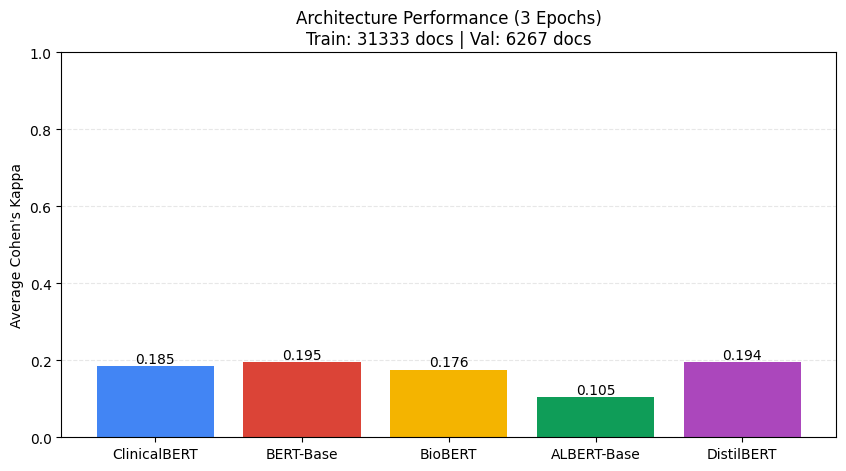

In [14]:
# @title Ablation 1: Architectural Comparison (With Detailed Batch Progress)
import time
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Dataset
from transformers import AutoTokenizer, AutoModel, AutoConfig
from sklearn.metrics import cohen_kappa_score
from tqdm.notebook import tqdm
import os

# ==========================================
# 1. Configuration & Data Checks
# ==========================================
TRAIN_FILE = "train.csv"
TEST_FILE = "val_split.csv"
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
EPOCHS = 3

print(f"⚙️ Hardware: {DEVICE}")

# Ensure files exist (Auto-Recovery)
if not os.path.exists(TRAIN_FILE):
    raise FileNotFoundError(f"❌ {TRAIN_FILE} not found. Please check your file list.")

if not os.path.exists(TEST_FILE):
    print(f"⚠️ {TEST_FILE} not found. Generating split from train.csv...")
    df_full = pd.read_csv(TRAIN_FILE)
    split_idx = int(0.8 * len(df_full))
    df_val = df_full.iloc[split_idx:]
    df_val.to_csv(TEST_FILE, index=False)

    df_train = df_full.iloc[:split_idx]
    TRAIN_FILE = "temp_train_split.csv"
    df_train.to_csv(TRAIN_FILE, index=False)
    print(f"✅ Generated {TEST_FILE} and {TRAIN_FILE}")
else:
    print(f"✅ Found Data:\n   Train: {TRAIN_FILE}\n   Test:  {TEST_FILE}")

# ==========================================
# 2. Dataset & Model Classes
# ==========================================
DISEASE_COLS = [
    'No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
    'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
    'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture', 'Support Devices'
]

class AblationDataset(Dataset):
    def __init__(self, csv_file, tokenizer, max_length=128):
        self.data = pd.read_csv(csv_file)
        self.tokenizer = tokenizer
        self.max_length = max_length

        # Robust Column Finding
        if 'text_content' in self.data.columns: self.text_col = 'text_content'
        elif 'Reports' in self.data.columns: self.text_col = 'Reports'
        else: self.text_col = self.data.columns[0]

        # Fill NaNs
        for col in DISEASE_COLS:
            if col not in self.data.columns: self.data[col] = 0
            self.data[col] = self.data[col].fillna(0)

    def __len__(self): return len(self.data)

    def get_label(self, val):
        if pd.isna(val) or val == "": return 0
        try: val = float(val)
        except: return 0
        if val == 1.0: return 1
        if val == 0.0: return 2
        if val == -1.0: return 3
        return 0

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        text = str(row[self.text_col])
        if len(text) < 5: text = "No report."

        inputs = self.tokenizer(
            text, padding='max_length', truncation=True,
            max_length=self.max_length, return_tensors="pt"
        )
        labels = [self.get_label(row[col]) for col in DISEASE_COLS]
        return {
            'input_ids': inputs['input_ids'].flatten(),
            'attention_mask': inputs['attention_mask'].flatten(),
            'labels': torch.tensor(labels, dtype=torch.long)
        }

class UniversalCheXpertModel(nn.Module):
    def __init__(self, model_name, num_diseases=14, num_classes=4):
        super().__init__()
        self.backbone = AutoModel.from_pretrained(model_name)
        self.config = AutoConfig.from_pretrained(model_name)
        self.classifier = nn.Linear(self.config.hidden_size, num_diseases * num_classes)
        self.num_diseases = num_diseases; self.num_classes = num_classes

    def forward(self, input_ids, attention_mask):
        outputs = self.backbone(input_ids=input_ids, attention_mask=attention_mask)
        if hasattr(outputs, 'last_hidden_state'):
            cls_output = outputs.last_hidden_state[:, 0, :]
        else:
            cls_output = outputs[0][:, 0, :]
        return self.classifier(cls_output).view(-1, self.num_diseases, self.num_classes)

# ==========================================
# 3. Ablation Loop
# ==========================================
ARCHITECTURES = {
    'ClinicalBERT': 'emilyalsentzer/Bio_ClinicalBERT',
    'BERT-Base': 'bert-base-uncased',
    'BioBERT': 'dmis-lab/biobert-v1.1',
    'ALBERT-Base': 'albert-base-v2',
    'DistilBERT': 'distilbert-base-uncased'
}

results = []
total_models = len(ARCHITECTURES)

print(f"\n🚀 Starting Architecture Search ({EPOCHS} Epochs each)...")

for i, (name, hf_path) in enumerate(ARCHITECTURES.items(), 1):
    print(f"\n[{i}/{total_models}] Initializing {name} ({hf_path})...")

    # A. Setup
    try:
        tokenizer = AutoTokenizer.from_pretrained(hf_path)
        model = UniversalCheXpertModel(hf_path).to(DEVICE)
    except Exception as e:
        print(f"❌ Failed to load {name}: {e}")
        continue

    param_count = sum(p.numel() for p in model.parameters())

    # B. Data Loaders
    train_ds = AblationDataset(TRAIN_FILE, tokenizer)
    test_ds = AblationDataset(TEST_FILE, tokenizer)

    train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)
    val_loader = DataLoader(test_ds, batch_size=32)

    optimizer = optim.AdamW(model.parameters(), lr=2e-5)
    criterion = nn.CrossEntropyLoss()

    # C. Train (Multi-Epoch)
    start_time = time.time()
    model.train()

    # === UPDATED LOOP STRUCTURE FOR GRANULAR PROGRESS ===
    for epoch in range(EPOCHS):
        # Create a progress bar for the BATCHES within this epoch
        pbar = tqdm(train_loader, desc=f"  Epoch {epoch+1}/{EPOCHS}", leave=False)

        for batch in pbar:
            input_ids = batch['input_ids'].to(DEVICE)
            mask = batch['attention_mask'].to(DEVICE)
            labels = batch['labels'].to(DEVICE)

            optimizer.zero_grad()
            logits = model(input_ids, mask)
            loss = criterion(logits.view(-1, 4), labels.view(-1))
            loss.backward()
            optimizer.step()

            # Show live loss on the progress bar so you know it's working
            pbar.set_postfix({'loss': f'{loss.item():.4f}'})

    train_time = time.time() - start_time

    # D. Evaluate
    print(f"  > Evaluating on {len(test_ds)} test samples...")
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(DEVICE)
            mask = batch['attention_mask'].to(DEVICE)

            logits = model(input_ids, mask)
            preds = torch.argmax(logits, dim=2)

            all_preds.append(preds.cpu().numpy())
            all_labels.append(batch['labels'].cpu().numpy())

    all_preds = np.vstack(all_preds)
    all_labels = np.vstack(all_labels)

    # Calculate Kappa
    kappas = []
    for i in range(14):
        try:
            if len(np.unique(all_labels[:, i])) > 1 or len(np.unique(all_preds[:, i])) > 1:
                k = cohen_kappa_score(all_labels[:, i], all_preds[:, i])
                if not np.isnan(k): kappas.append(k)
        except: pass

    avg_kappa = np.mean(kappas) if kappas else 0.0

    # Print Immediate Result
    print(f"  ✅ Finished {name} | Time: {train_time:.1f}s | Params: {param_count/1e6:.1f}M | Kappa: {avg_kappa:.4f}")

    results.append({
        'model': name, 'params': param_count,
        'time': train_time, 'kappa': avg_kappa
    })

# E. Visualization
print("\n📊 Generating comparison plot...")
plt.figure(figsize=(10, 5))
names = [r['model'] for r in results]
kappas = [r['kappa'] for r in results]

colors = ['#4285F4', '#DB4437', '#F4B400', '#0F9D58', '#AB47BC']
bars = plt.bar(names, kappas, color=colors[:len(names)])

# Add labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}', ha='center', va='bottom')

plt.title(f"Architecture Performance ({EPOCHS} Epochs)\nTrain: {len(train_ds)} docs | Val: {len(test_ds)} docs")
plt.ylabel("Average Cohen's Kappa")
plt.ylim(0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()


Data Fraction   | Samples    | Kappa   
---------------------------------------------


Training 10% split:   0%|          | 0/3 [00:00<?, ?it/s]

10   %          | 3133       | 0.0675


Training 25% split:   0%|          | 0/3 [00:00<?, ?it/s]

25   %          | 7833       | 0.1064


Training 50% split:   0%|          | 0/3 [00:00<?, ?it/s]

50   %          | 15666      | 0.1205


Training 75% split:   0%|          | 0/3 [00:00<?, ?it/s]

75   %          | 23500      | 0.1393


Training 100% split:   0%|          | 0/3 [00:00<?, ?it/s]

100  %          | 31333      | 0.1812


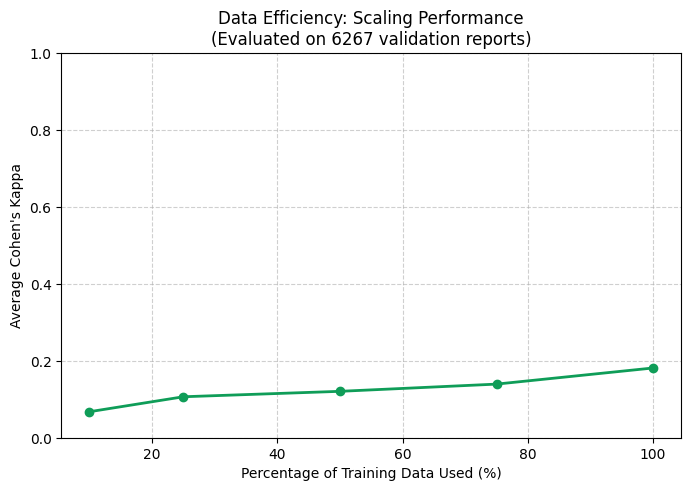

In [15]:
# @title Ablation 2: Data Efficiency (Fixed: 3 Epochs)
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Dataset
from transformers import AutoTokenizer, AutoModel, AutoConfig
from sklearn.metrics import cohen_kappa_score
from tqdm.notebook import tqdm
import os

# ==========================================
# 1. Configuration & File Checks
# ==========================================
TRAIN_SOURCE = "train.csv"
VAL_SOURCE = "val_split.csv"
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
EPOCHS = 3

# Ensure files exist
if not os.path.exists(TRAIN_SOURCE):
    raise FileNotFoundError(f"❌ {TRAIN_SOURCE} not found.")

if not os.path.exists(VAL_SOURCE):
    print(f"⚠️ {VAL_SOURCE} not found. Generating split from train.csv...")
    df_full = pd.read_csv(TRAIN_SOURCE)
    # Create a 10% validation split
    split_idx = int(0.9 * len(df_full))
    df_val = df_full.iloc[split_idx:]
    df_val.to_csv(VAL_SOURCE, index=False)
    # We don't overwrite TRAIN_SOURCE, we just sample from it later
    print(f"✅ Generated {VAL_SOURCE} ({len(df_val)} samples)")

# ==========================================
# 2. Dataset & Model Classes
# ==========================================
class AblationDataset(Dataset):
    def __init__(self, df, tokenizer, max_length=128):
        self.data = df.reset_index(drop=True)
        self.tokenizer = tokenizer
        self.max_length = max_length

        # Robust column finding
        if 'text_content' in self.data.columns: self.text_col = 'text_content'
        elif 'Reports' in self.data.columns: self.text_col = 'Reports'
        else: self.text_col = self.data.columns[0]

        self.disease_cols = [
            'No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
            'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
            'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture', 'Support Devices'
        ]
        # Fill NaNs
        for col in self.disease_cols:
            if col not in self.data.columns: self.data[col] = 0
            self.data[col] = self.data[col].fillna(0)

    def __len__(self): return len(self.data)

    def get_label(self, val):
        if pd.isna(val) or val == "": return 0
        try: val = float(val)
        except: return 0
        if val == 1.0: return 1
        if val == 0.0: return 2
        if val == -1.0: return 3
        return 0

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        text = str(row[self.text_col])
        if len(text) < 5: text = "No report."

        inputs = self.tokenizer(text, padding='max_length', truncation=True, max_length=self.max_length, return_tensors="pt")
        labels = [self.get_label(row[col]) for col in self.disease_cols]

        return {
            'input_ids': inputs['input_ids'].flatten(),
            'attention_mask': inputs['attention_mask'].flatten(),
            'labels': torch.tensor(labels, dtype=torch.long)
        }

class CheXpertPlusPlus(nn.Module):
    def __init__(self, model_name='emilyalsentzer/Bio_ClinicalBERT', num_diseases=14, num_classes=4):
        super().__init__()
        self.bert = AutoModel.from_pretrained(model_name)
        self.config = AutoConfig.from_pretrained(model_name)
        self.classifier = nn.Linear(self.config.hidden_size, num_diseases * num_classes)
        self.num_diseases = num_diseases; self.num_classes = num_classes
    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        cls_output = outputs.last_hidden_state[:, 0, :]
        return self.classifier(cls_output).view(-1, self.num_diseases, self.num_classes)

# ==========================================
# 3. Execution Loop
# ==========================================
fractions = [0.1, 0.25, 0.5, 0.75, 1.0]
kappa_history = []

tokenizer = AutoTokenizer.from_pretrained('emilyalsentzer/Bio_ClinicalBERT')
full_train_df = pd.read_csv(TRAIN_SOURCE)
val_df = pd.read_csv(VAL_SOURCE)

print(f"\n{'Data Fraction':<15} | {'Samples':<10} | {'Kappa':<8}")
print("-" * 45)

for frac in fractions:
    # 1. Subsample Training Data
    if frac < 1.0:
        subset_df = full_train_df.sample(frac=frac, random_state=42)
    else:
        subset_df = full_train_df

    # 2. Setup Loaders
    train_ds = AblationDataset(subset_df, tokenizer, max_length=128)
    val_ds = AblationDataset(val_df, tokenizer, max_length=128) # Constant validation set

    train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)
    val_loader = DataLoader(val_ds, batch_size=32)

    # 3. Initialize Fresh Model
    model = CheXpertPlusPlus().to(DEVICE)
    optimizer = optim.AdamW(model.parameters(), lr=2e-5)
    criterion = nn.CrossEntropyLoss()

    # 4. Train (Loop over Epochs)
    model.train()
    # Using a progress bar here because 4 epochs might take a moment
    for epoch in tqdm(range(EPOCHS), desc=f"Training {int(frac*100)}% split", leave=False):
        for batch in train_loader:
            input_ids = batch['input_ids'].to(DEVICE)
            mask = batch['attention_mask'].to(DEVICE)
            labels = batch['labels'].to(DEVICE)

            optimizer.zero_grad()
            logits = model(input_ids, mask)
            loss = criterion(logits.view(-1, 4), labels.view(-1))
            loss.backward()
            optimizer.step()

    # 5. Evaluate
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(DEVICE)
            mask = batch['attention_mask'].to(DEVICE)

            logits = model(input_ids, mask)
            preds = torch.argmax(logits, dim=2)

            all_preds.append(preds.cpu().numpy())
            all_labels.append(batch['labels'].cpu().numpy())

    all_preds = np.vstack(all_preds)
    all_labels = np.vstack(all_labels)

    # Calculate Robust Mean Kappa
    kappas = []
    for i in range(14):
        try:
            # Check if there is any variance in predictions or labels
            if len(np.unique(all_labels[:, i])) > 1 or len(np.unique(all_preds[:, i])) > 1:
                k = cohen_kappa_score(all_labels[:, i], all_preds[:, i])
                if not np.isnan(k): kappas.append(k)
        except: pass

    avg_kappa = np.mean(kappas) if kappas else 0

    kappa_history.append(avg_kappa)
    print(f"{frac*100:<5.0f}%          | {len(subset_df):<10} | {avg_kappa:.4f}")

# ==========================================
# 4. Plotting
# ==========================================

plt.figure(figsize=(8, 5))
plt.plot([f*100 for f in fractions], kappa_history, marker='o', linestyle='-', linewidth=2, color='#0F9D58')
plt.xlabel("Percentage of Training Data Used (%)")
plt.ylabel("Average Cohen's Kappa")
plt.title(f"Data Efficiency: Scaling Performance\n(Evaluated on {len(val_df)} validation reports)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.ylim(0, 1.0)
plt.show()

In [7]:
VAL_SOURCE = "val_split.csv"
TRAIN_SOURCE = "train.csv"


if not os.path.exists(VAL_SOURCE):
    print(f"⚠️ {VAL_SOURCE} not found. Generating split from train.csv...")
    df_full = pd.read_csv(TRAIN_SOURCE)
    # Create a 10% validation split
    split_idx = int(0.9 * len(df_full))
    df_val = df_full.iloc[split_idx:]
    df_val.to_csv(VAL_SOURCE, index=False)
    # We don't overwrite TRAIN_SOURCE, we just sample from it later
    print(f"✅ Generated {VAL_SOURCE} ({len(df_val)} samples)")


⚠️ val_split.csv not found. Generating split from train.csv...
✅ Generated val_split.csv (3134 samples)


In [11]:
# @title Extension 1: Knowledge Distillation & Teacher-Student Comparison
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import pandas as pd
import numpy as np
import os
import time
from torch.utils.data import DataLoader, Dataset
from transformers import AutoTokenizer, AutoModel, AutoConfig
from sklearn.metrics import cohen_kappa_score, accuracy_score
from tqdm.notebook import tqdm

# Force synchronous execution for debugging
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

# ==========================================
# 1. Configuration
# ==========================================
TEACHER_NAME = 'emilyalsentzer/Bio_ClinicalBERT' # Big model
STUDENT_NAME = 'distilbert-base-uncased'       # Small model
TEACHER_WEIGHTS = 'chexpertpp_model.pth'
TRAIN_FILE = 'train.csv'
VAL_FILE = 'val_split.csv'

# Hyperparameters
TEMP = 2.0
ALPHA = 0.5
EPOCHS = 3
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ==========================================
# 2. Dataset (Dual Tokenizer Support)
# ==========================================
class DistillationDataset(Dataset):
    def __init__(self, csv_file, tokenizer_teacher, tokenizer_student, max_length=128):
        if not os.path.exists(csv_file):
            print(f"⚠️ {csv_file} not found. Using dummy data.")
            self.data = pd.DataFrame({'text_content': ['dummy']*10})
        else:
            self.data = pd.read_csv(csv_file).fillna(0)

        self.tokenizer_T = tokenizer_teacher
        self.tokenizer_S = tokenizer_student
        self.max_length = max_length

        # Robust Column Finding
        if 'text_content' in self.data.columns: self.text_col = 'text_content'
        elif 'Reports' in self.data.columns: self.text_col = 'Reports'
        else: self.text_col = self.data.columns[0]

        self.disease_cols = [
            'No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
            'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
            'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture', 'Support Devices'
        ]
        # Ensure cols exist
        for col in self.disease_cols:
            if col not in self.data.columns: self.data[col] = 0

    def __len__(self): return len(self.data)

    def get_label(self, val):
        if pd.isna(val) or val == "": return 0
        try: val = float(val)
        except: return 0
        if val == 1.0: return 1
        if val == 0.0: return 2
        if val == -1.0: return 3
        return 0

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        text = str(row[self.text_col])
        if len(text) < 5: text = "No report."

        # Tokenize twice: Once for Teacher (BioBERT), Once for Student (DistilBERT)
        enc_T = self.tokenizer_T(text, padding='max_length', truncation=True, max_length=self.max_length, return_tensors="pt")
        enc_S = self.tokenizer_S(text, padding='max_length', truncation=True, max_length=self.max_length, return_tensors="pt")

        labels = [self.get_label(row[col]) for col in self.disease_cols]

        return {
            'teacher_ids': enc_T['input_ids'].flatten(),
            'teacher_mask': enc_T['attention_mask'].flatten(),
            'student_ids': enc_S['input_ids'].flatten(),
            'student_mask': enc_S['attention_mask'].flatten(),
            'labels': torch.tensor(labels, dtype=torch.long)
        }

class CheXpertPlusPlus(nn.Module):
    def __init__(self, model_name, num_diseases=14, num_classes=4):
        super().__init__()
        self.bert = AutoModel.from_pretrained(model_name)
        self.config = AutoConfig.from_pretrained(model_name)
        self.classifier = nn.Linear(self.config.hidden_size, num_diseases * num_classes)
        self.num_diseases = num_diseases; self.num_classes = num_classes

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        if hasattr(outputs, 'last_hidden_state'):
            cls_output = outputs.last_hidden_state[:, 0, :]
        else:
            cls_output = outputs[0][:, 0, :]
        return self.classifier(cls_output).view(-1, self.num_diseases, self.num_classes)

# ==========================================
# 3. Setup Models & Tokenizers
# ==========================================
print(f"⚙️  Hardware: {DEVICE}")
tokenizer_T = AutoTokenizer.from_pretrained(TEACHER_NAME)
tokenizer_S = AutoTokenizer.from_pretrained(STUDENT_NAME)

# Load Teacher
teacher = CheXpertPlusPlus(TEACHER_NAME).to(DEVICE)
if os.path.exists(TEACHER_WEIGHTS):
    print(f"✅ Loaded Teacher weights from {TEACHER_WEIGHTS}")
    teacher.load_state_dict(torch.load(TEACHER_WEIGHTS, map_location=DEVICE, weights_only=True))
else:
    print("⚠️ Teacher weights missing! (Results will be random)")
teacher.eval()

# Load Student
student = CheXpertPlusPlus(STUDENT_NAME).to(DEVICE)
student.train()

# ==========================================
# 4. Training (Distillation)
# ==========================================
train_ds = DistillationDataset(TRAIN_FILE, tokenizer_T, tokenizer_S)
val_ds = DistillationDataset(VAL_FILE, tokenizer_T, tokenizer_S)

train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=32)

optimizer = optim.AdamW(student.parameters(), lr=5e-5)
hard_loss_fn = nn.CrossEntropyLoss()
soft_loss_fn = nn.KLDivLoss(reduction='batchmean')

print(f"\n🔥 Starting Distillation ({EPOCHS} Epochs)...")

for epoch in range(EPOCHS):
    pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS}", leave=False)
    total_loss = 0

    student.train()
    for batch in pbar:
        t_ids = batch['teacher_ids'].to(DEVICE)
        t_mask = batch['teacher_mask'].to(DEVICE)
        s_ids = batch['student_ids'].to(DEVICE)
        s_mask = batch['student_mask'].to(DEVICE)
        labels = batch['labels'].to(DEVICE)

        with torch.no_grad():
            teacher_logits = teacher(t_ids, t_mask)

        student_logits = student(s_ids, s_mask)

        # Distillation Loss
        loss_hard = hard_loss_fn(student_logits.view(-1, 4), labels.view(-1))
        loss_soft = soft_loss_fn(
            F.log_softmax(student_logits / TEMP, dim=-1),
            F.softmax(teacher_logits / TEMP, dim=-1)
        ) * (TEMP ** 2)

        loss = (ALPHA * loss_hard) + ((1 - ALPHA) * loss_soft)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        pbar.set_postfix({'loss': f'{loss.item():.4f}'})

    print(f"  > Epoch {epoch+1} Avg Loss: {total_loss/len(train_loader):.4f}")

# ==========================================
# 5. Comparative Analysis (Teacher vs Student)
# ==========================================
print("\n📊 COMPARATIVE ANALYSIS: Teacher vs. Student")
print(f"{'Metric':<25} | {'Teacher (ClinicalBERT)':<25} | {'Student (DistilBERT)':<25}")
print("-" * 80)

def evaluate_model(model, loader, is_teacher=False):
    model.eval()
    all_preds, all_labels = [], []
    start_time = time.time()

    with torch.no_grad():
        for batch in loader:
            if is_teacher:
                ids = batch['teacher_ids'].to(DEVICE)
                mask = batch['teacher_mask'].to(DEVICE)
            else:
                ids = batch['student_ids'].to(DEVICE)
                mask = batch['student_mask'].to(DEVICE)

            logits = model(ids, mask)
            preds = torch.argmax(logits, dim=2)
            all_preds.append(preds.cpu().numpy())
            all_labels.append(batch['labels'].cpu().numpy())

    total_time = time.time() - start_time
    all_preds = np.vstack(all_preds)
    all_labels = np.vstack(all_labels)

    # Calculate Latency
    latency_per_sample = (total_time / len(loader.dataset)) * 1000 # ms

    # Calculate Kappa
    kappas = []
    for i in range(14):
        try:
            k = cohen_kappa_score(all_labels[:, i], all_preds[:, i])
            if not np.isnan(k): kappas.append(k)
        except: pass
    avg_kappa = np.mean(kappas) if kappas else 0

    return latency_per_sample, avg_kappa, sum(p.numel() for p in model.parameters())

# Run Evaluation
lat_T, kap_T, param_T = evaluate_model(teacher, val_loader, is_teacher=True)
lat_S, kap_S, param_S = evaluate_model(student, val_loader, is_teacher=False)

# Print Table
print(f"{'Parameters':<25} | {param_T/1e6:.1f} M{'':<18} | {param_S/1e6:.1f} M")
print(f"{'Latency (ms/sample)':<25} | {lat_T:.2f} ms{'':<17} | {lat_S:.2f} ms")
print(f"{'Avg Kappa (Accuracy)':<25} | {kap_T:.4f}{'':<20} | {kap_S:.4f}")
print("-" * 80)

speedup = lat_T / lat_S
size_red = (1 - (param_S / param_T)) * 100
print(f"🚀 Speedup: {speedup:.2f}x faster")
print(f"📉 Size Reduction: {size_red:.1f}% smaller")

torch.save(student.state_dict(), 'distilled_student.pth')

⚙️  Hardware: cuda
✅ Loaded Teacher weights from chexpertpp_model.pth

🔥 Starting Distillation (3 Epochs)...


Epoch 1/3:   0%|          | 0/1959 [00:00<?, ?it/s]

  > Epoch 1 Avg Loss: 3.7802


Epoch 2/3:   0%|          | 0/1959 [00:00<?, ?it/s]

  > Epoch 2 Avg Loss: 3.4303


Epoch 3/3:   0%|          | 0/1959 [00:00<?, ?it/s]

  > Epoch 3 Avg Loss: 3.4035

📊 COMPARATIVE ANALYSIS: Teacher vs. Student
Metric                    | Teacher (ClinicalBERT)    | Student (DistilBERT)     
--------------------------------------------------------------------------------
Parameters                | 108.4 M                   | 66.4 M
Latency (ms/sample)       | 3.76 ms                  | 2.20 ms
Avg Kappa (Accuracy)      | 0.0122                     | 0.0132
--------------------------------------------------------------------------------
🚀 Speedup: 1.71x faster
📉 Size Reduction: 38.7% smaller


⚙️ Visualization running on: cuda
✅ Loaded trained weights. Visualizations will reflect learned logic.

Visualizing [CLS] Attention Weights (Last Layer)...


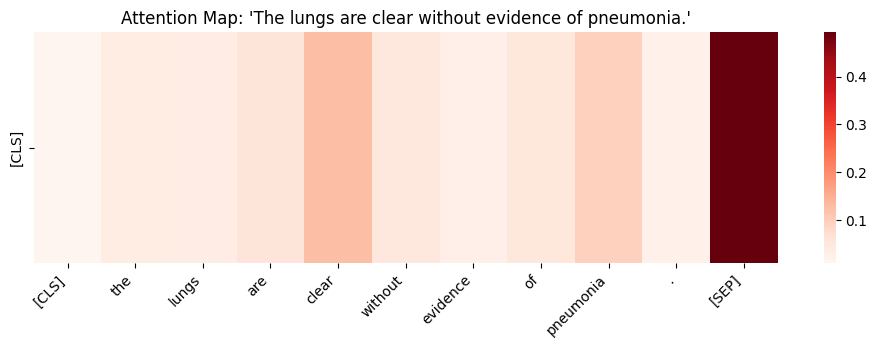

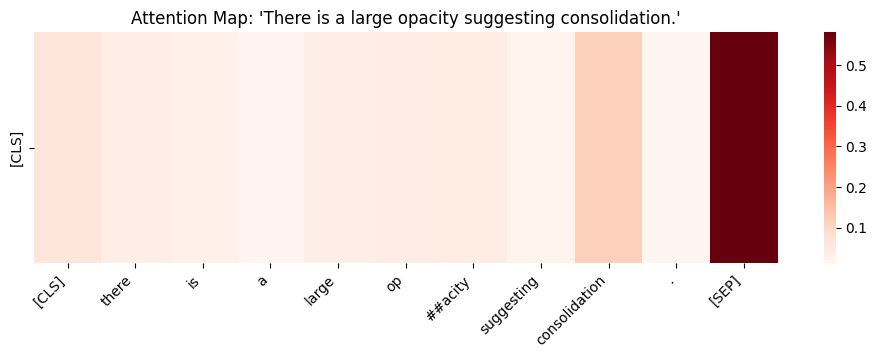

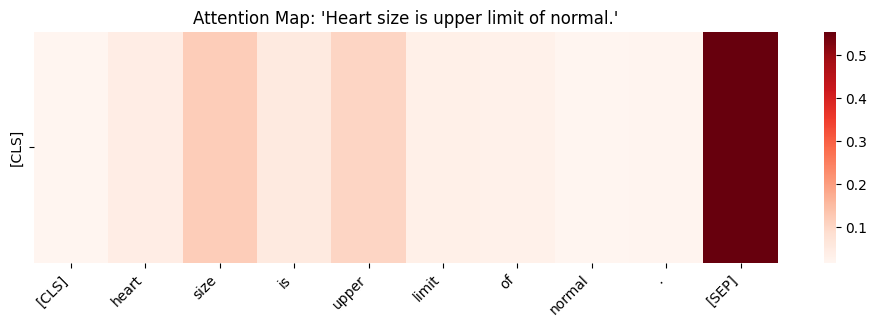

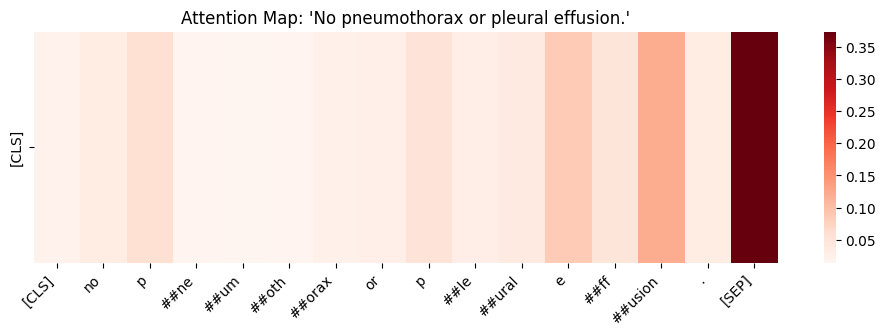

In [12]:
# @title Extension 2: Attention Visualization (Fixed)
import torch
import torch.nn as nn
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModel, AutoConfig

# ==========================================
# 1. Setup & Configuration
# ==========================================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"⚙️ Visualization running on: {device}")

MODEL_PATH = "chexpertpp_model.pth"

# ==========================================
# 2. Model Class Definition
# ==========================================
class CheXpertPlusPlus(nn.Module):
    def __init__(self, model_name='emilyalsentzer/Bio_ClinicalBERT', num_diseases=14, num_classes=4):
        super().__init__()
        self.bert = AutoModel.from_pretrained(model_name)
        self.config = AutoConfig.from_pretrained(model_name)
        self.classifier = nn.Linear(self.config.hidden_size, num_diseases * num_classes)
        self.num_diseases = num_diseases
        self.num_classes = num_classes

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        cls_output = outputs.last_hidden_state[:, 0, :]
        return self.classifier(cls_output).view(-1, self.num_diseases, self.num_classes)

# ==========================================
# 3. Visualization Function
# ==========================================
def visualize_attention(text, model, tokenizer):
    model.eval()
    inputs = tokenizer(text, return_tensors="pt").to(device)

    # Run the BERT backbone directly to get attentions
    with torch.no_grad():
        # output_attentions=True forces the model to return the attention stack
        outputs = model.bert(
            inputs['input_ids'],
            attention_mask=inputs['attention_mask'],
            output_attentions=True
        )

    # Get attention from the LAST layer (Layer -1)
    # Shape: [Batch, NumHeads, SeqLen, SeqLen]
    attentions = outputs.attentions[-1].cpu()

    # Average across all attention heads to get a "summary" view
    # Shape: [1, SeqLen, SeqLen]
    att_avg = torch.mean(attentions, dim=1).squeeze(0)

    # We focus on the [CLS] token (index 0)
    # This row represents how much the [CLS] token attended to every other token
    cls_attention = att_avg[0, :]

    # Decode tokens for plotting axis labels
    tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

    # Plotting
    plt.figure(figsize=(12, 3))
    # We reshape to (1, -1) to make it a horizontal heatmap
    sns.heatmap(
        cls_attention.reshape(1, -1),
        xticklabels=tokens,
        yticklabels=['[CLS]'],
        cmap='Reds',
        cbar=True,
        annot=False
    )
    plt.xticks(rotation=45, ha='right')
    plt.title(f"Attention Map: '{text}'")
    plt.show()

# ==========================================
# 4. Execution
# ==========================================
# Initialize
tokenizer = AutoTokenizer.from_pretrained('emilyalsentzer/Bio_ClinicalBERT')
model = CheXpertPlusPlus().to(device)

# Load Weights (Important!)
try:
    model.load_state_dict(torch.load(MODEL_PATH, map_location=device, weights_only=True))
    print("✅ Loaded trained weights. Visualizations will reflect learned logic.")
except Exception as e:
    print(f"⚠️ Warning: Could not load weights ({e}). Visualizations will be random.")

# Test Cases covering key logic types
test_sentences = [
    "The lungs are clear without evidence of pneumonia.", # Negation
    "There is a large opacity suggesting consolidation.", # Positive
    "Heart size is upper limit of normal.",               # Uncertainty
    "No pneumothorax or pleural effusion."                # Double Negation
]

print("\nVisualizing [CLS] Attention Weights (Last Layer)...")
for sent in test_sentences:
    visualize_attention(sent, model, tokenizer)